# Pymaceuticals Inc.
---

### Analysis

 - The correlation coefficient between mouse weight and average tumor volume is 0.53 for Mouse Weight vs. Average Tumor Volume for the Capomulin Regimen
 - The mouse with mouse ID l509 was treated with Capomulin and showed a constant decrease in tumor size as timepoints progressed, but also showed a slight increase after each significant decrease.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


# Combine the data into a single DataFrame
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
combined_data




,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
number_of_mice = combined_data["Mouse ID"].nunique()

print("Number of mice:", number_of_mice)


Number of mice: 249


In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mice = combined_data[combined_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]

duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
# Find duplicate mice based on Mouse ID and Timepoint
duplicate_mice = combined_data[combined_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]

# Display all the data for the duplicate mouse IDs
print("Data for duplicate mouse IDs:")
print(duplicate_mice)


Data for duplicate mouse IDs:
    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
908           45.000000                 0  
909           45.000000                 0  
910           48.786801                 0  
9

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# Create a clean DataFrame by dropping the duplicate mouse by its ID
clean_data = combined_data.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='first')

# Display the first few rows of the clean DataFrame

clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.

number_of_mice_clean = clean_data["Mouse ID"].nunique()
print("Number of mice in the clean DataFrame:", number_of_mice_clean)


Number of mice in the clean DataFrame: 249


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen



# Group the data by "Drug Regimen"
grouped_data = clean_data.groupby("Drug Regimen")

# Calculate mean, median, variance, standard deviation, and SEM of the tumor volume for each drug regimen
mean_tumor_volume = grouped_data["Tumor Volume (mm3)"].mean()
median_tumor_volume = grouped_data["Tumor Volume (mm3)"].median()
variance_tumor_volume = grouped_data["Tumor Volume (mm3)"].var()
std_deviation_tumor_volume = grouped_data["Tumor Volume (mm3)"].std()
sem_tumor_volume = grouped_data["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame
summary_statistics = pd.DataFrame({
    "Mean": mean_tumor_volume,
    "Median": median_tumor_volume,
    "Variance": variance_tumor_volume,
    "Std Deviation": std_deviation_tumor_volume,
    "SEM": sem_tumor_volume
})

# Display the summary statistics DataFrame
summary_statistics



,Mean,Median,Variance,Std Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method to calculate multiple summary statistics in a single line
summary_statistics = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])

# Rename the columns for clarity
summary_statistics.columns = ["Mean", "Median", "Variance", "Std Deviation", "SEM"]

# Display the summary statistics DataFrame
summary_statistics


,Mean,Median,Variance,Std Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<Axes: title={'center': 'Total Number of rows (Mouse ID/Timepoints) for Each Drug Regimen'}, xlabel='Drug Regimen', ylabel='Number of rows'>

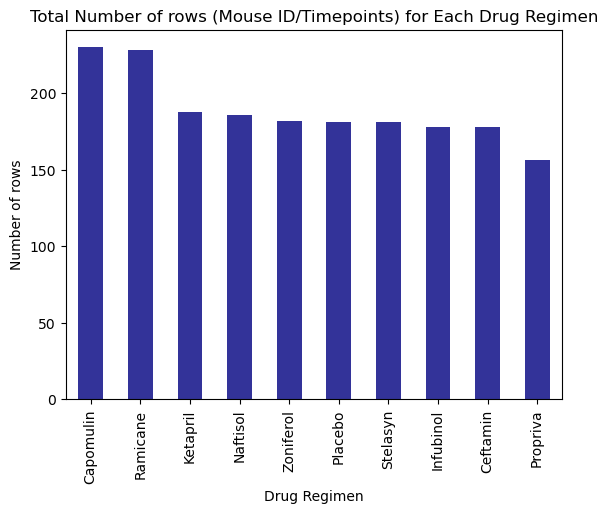

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_regimen_counts = clean_data["Drug Regimen"].value_counts()

# Create a bar plot using pandas
drug_regimen_counts.plot(kind='bar', color='navy', alpha=0.8, xlabel="Drug Regimen", ylabel="Number of rows", title="Total Number of rows (Mouse ID/Timepoints) for Each Drug Regimen")

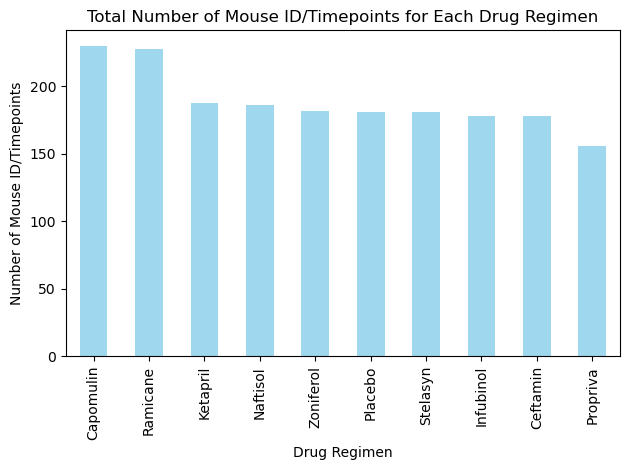

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# Group the data by "Drug Regimen" and count the number of rows in each group
drug_regimen_counts = clean_data["Drug Regimen"].value_counts()

# Create a bar plot using pandas
drug_regimen_counts.plot(kind='bar', color='skyblue', alpha=0.8)

# Add labels and title
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mouse ID/Timepoints")
plt.title("Total Number of Mouse ID/Timepoints for Each Drug Regimen")

# Show the plot
plt.tight_layout()
plt.show()





<Axes: title={'center': 'Distribution of Female versus Male Mice'}>

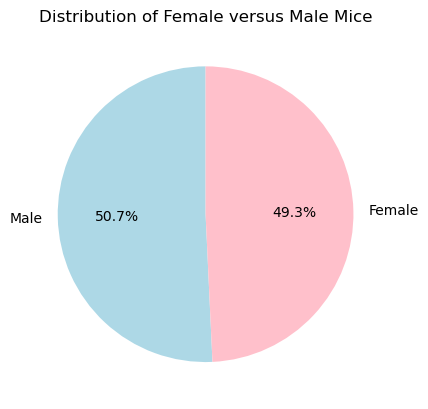

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Count the number of occurrences of each gender in the "Sex" column
gender_distribution = clean_data["Sex"].value_counts()

# Create a pie plot using pandas
gender_distribution.plot(kind='pie', colors=['lightblue', 'pink'], autopct='%1.1f%%', startangle=90, title="Distribution of Female versus Male Mice", ylabel="")


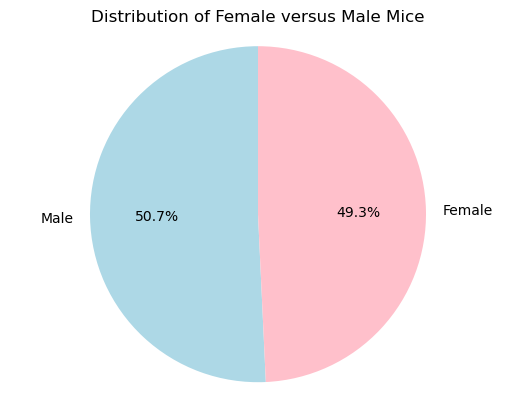

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Count the number of occurrences of each gender in the "Sex" column
gender_distribution = clean_data["Sex"].value_counts()

# Create a pie plot using pyplot from matplotlib
plt.pie(gender_distribution, labels=gender_distribution.index, colors=['lightblue', 'pink'], autopct='%1.1f%%', startangle=90)

# Add title
plt.title("Distribution of Female versus Male Mice")

# Show the plot
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
selected_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
final_timepoints = clean_data[clean_data["Drug Regimen"].isin(selected_regimens)]

# Start by getting the last (greatest) timepoint for each mouse
final_timepoints_grouped = final_timepoints.groupby("Mouse ID")["Timepoint"].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(final_timepoints_grouped, clean_data, on=["Mouse ID", "Timepoint"], how="left")[["Mouse ID", "Timepoint", "Tumor Volume (mm3)", "Drug Regimen"]]

# Display the DataFrame showing the final tumor volume of each mouse for the specified treatment regimens
final_tumor_volume


,Mouse ID,Timepoint,Tumor Volume (mm3),Drug Regimen
0,a203,45,67.973419,Infubinol
1,a251,45,65.525743,Infubinol
2,a275,45,62.999356,Ceftamin
3,a411,45,38.407618,Ramicane
4,a444,45,43.047543,Ramicane
...,...,...,...,...
95,y769,45,68.594745,Ceftamin
96,y793,45,31.896238,Capomulin
97,y865,45,64.729837,Ceftamin
98,z578,45,30.638696,Ramicane


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor volume data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for treatment in treatments_list:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol = final_tumor_volume[final_tumor_volume["Drug Regimen"] == treatment]["Tumor Volume (mm3)"]
    tumor_vol_data.append(tumor_vol)
    
    # Calculate the quartiles and IQR
    quartiles = tumor_vol.quantile([0.25, 0.5, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    
    # Determine outliers using upper and lower bounds
    lower_bound = lower_quartile - 1.5 * iqr
    upper_bound = upper_quartile + 1.5 * iqr
    
    # Identify any potential outliers
    outliers = tumor_vol[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]
    
    print(f"--------------------------------------")
    print(f"Treatment: {treatment}")
    print(f"Lower Quartile: {lower_quartile}")
    print(f"Upper Quartile: {upper_quartile}")
    print(f"IQR: {iqr}")
    print(f"Lower Bound: {lower_bound}")
    print(f"Upper Bound: {upper_bound}")
    print(f"Potential Outliers: {outliers.values}")
    print(f"--------------------------------------")


--------------------------------------
Treatment: Capomulin
Lower Quartile: 32.37735684
Upper Quartile: 40.1592203
IQR: 7.781863460000004
Lower Bound: 20.70456164999999
Upper Bound: 51.83201549
Potential Outliers: []
--------------------------------------
--------------------------------------
Treatment: Ramicane
Lower Quartile: 31.56046955
Upper Quartile: 40.65900627
IQR: 9.098536719999998
Lower Bound: 17.912664470000003
Upper Bound: 54.30681135
Potential Outliers: []
--------------------------------------
--------------------------------------
Treatment: Infubinol
Lower Quartile: 54.04860769
Upper Quartile: 65.52574285
IQR: 11.477135160000003
Lower Bound: 36.83290494999999
Upper Bound: 82.74144559000001
Potential Outliers: [36.3213458]
--------------------------------------
--------------------------------------
Treatment: Ceftamin
Lower Quartile: 48.72207785
Upper Quartile: 64.29983003
IQR: 15.577752179999997
Lower Bound: 25.355449580000002
Upper Bound: 87.66645829999999
Potential O

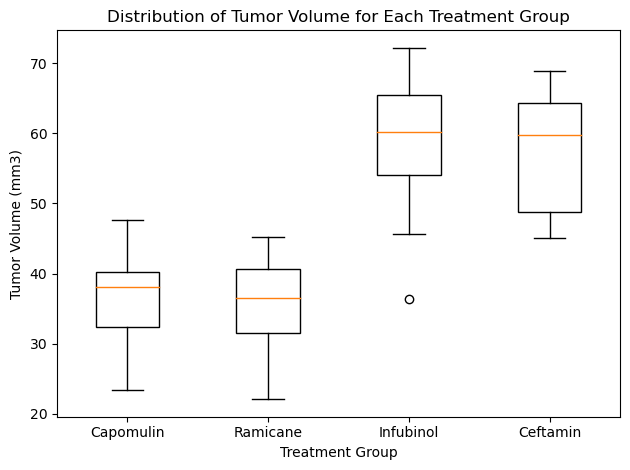

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
# Create a DataFrame for the tumor volume data of each treatment group
tumor_vol_df = pd.DataFrame(tumor_vol_data, index=treatments_list).T

# Generate the box plot using matplotlib
plt.boxplot(tumor_vol_data, labels=treatments_list, patch_artist=True, boxprops=dict(facecolor='white'))

# Add labels and title
plt.xlabel("Treatment Group")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Distribution of Tumor Volume for Each Treatment Group")

# Show the plot
plt.tight_layout()
plt.show()

## Line and Scatter Plots

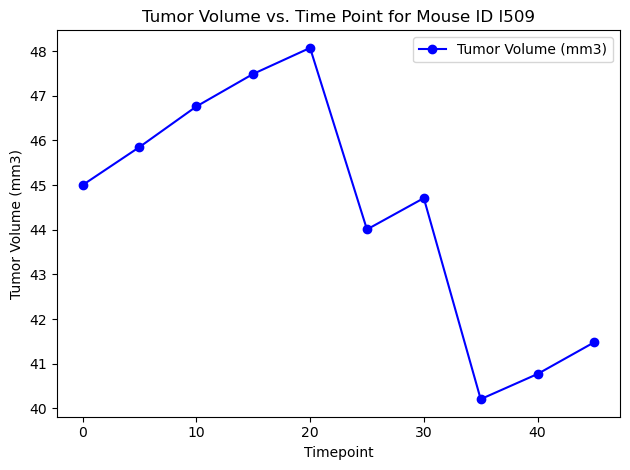

In [20]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Select a mouse that was treated with Capomulin    
mouse_id = "l509"

# Create a DataFrame for the selected mouse
mouse_data = clean_data[clean_data["Mouse ID"] == mouse_id]

# Generate the line plot using pandas
mouse_data.plot(kind='line', x='Timepoint', y='Tumor Volume (mm3)', color='blue', marker='o', title=f"Tumor Volume vs. Time Point for Mouse ID {mouse_id}")

# Add labels
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")

# Show the plot
plt.tight_layout()
plt.show()


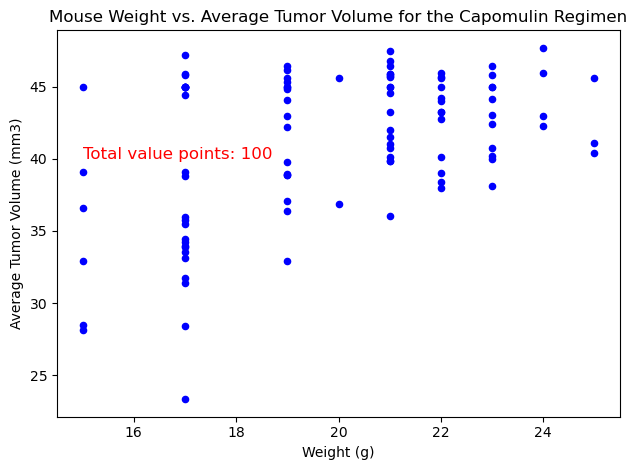

In [31]:
# Assuming you already have 'clean_data' DataFrame with necessary data

# Group the data by "Mouse ID" and calculate the average tumor volume for each mouse
avg_tumor_vol = clean_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

# Create a DataFrame for the average tumor volume data
avg_tumor_vol_df = pd.DataFrame(avg_tumor_vol)
avg_tumor_vol_df = avg_tumor_vol_df.reset_index()  # Resetting the index to make 'Mouse ID' a column again

# Merge the average tumor volume DataFrame with the clean_data DataFrame
capomulin_data = pd.merge(clean_data[clean_data["Drug Regimen"] == "Capomulin"], avg_tumor_vol_df, on="Mouse ID", how="inner")

# Sample a subset of data for the scatter plot
sample_size = 100  # Adjust this value based on the desired number of data points in the plot
capomulin_data_sampled = capomulin_data.sample(n=sample_size, random_state=42)

# Generate the scatter plot using pandas
capomulin_data_sampled.plot(kind='scatter', x='Weight (g)', y='Tumor Volume (mm3)_x', color='blue', title="Mouse Weight vs. Average Tumor Volume for the Capomulin Regimen")

# Add labels
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

# Count the number of values in the DataFrame
num_values = len(capomulin_data_sampled)

# Show the count on the plot
plt.text(15, 40, f"Total value points: {num_values}", fontsize=12, color='red')

# Show the plot
plt.tight_layout()
plt.show()








## Correlation and Regression

The correlation coefficient between mouse weight and average tumor volume is 0.53


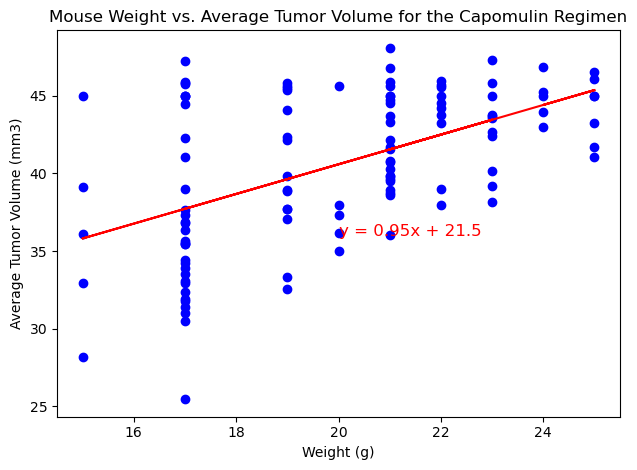

In [35]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen


# Obtain the number of data points in the Capomulin regimen
num_data_points = capomulin_data.shape[0]

# Determine the step size for systematic sampling
step = max(1, num_data_points // 100)  # Using max(1, ...) to ensure at least 1 data point is sampled

# Sample the data using systematic sampling
capomulin_data_sampled = capomulin_data.iloc[::step]

# Calculate the correlation coefficient
correlation_coefficient = st.pearsonr(capomulin_data_sampled["Weight (g)"], capomulin_data_sampled["Tumor Volume (mm3)_x"])[0]

# Print the correlation coefficient
print(f"The correlation coefficient between mouse weight and average tumor volume is {round(correlation_coefficient, 2)}")

# Calculate the linear regression model
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(capomulin_data_sampled["Weight (g)"], capomulin_data_sampled["Tumor Volume (mm3)_x"])

# Calculate the regression values
regress_values = capomulin_data_sampled["Weight (g)"] * slope + intercept

# Create the regression equation
regression_equation = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

# Generate the scatter plot using pyplot from matplotlib
plt.scatter(capomulin_data_sampled["Weight (g)"], capomulin_data_sampled["Tumor Volume (mm3)_x"], color='blue')

# Plot the regression line
plt.plot(capomulin_data_sampled["Weight (g)"], regress_values, color='red')

# Add labels and title
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Weight vs. Average Tumor Volume for the Capomulin Regimen")

# Add the regression equation
plt.annotate(regression_equation, (20, 36), fontsize=12, color='red')

# Show the plot
plt.tight_layout()
plt.show()
